# Prevendo Turnover

![turn](http://www.kenoby.com/wp-content/uploads/2017/04/1-job-rotation.jpg)

## Uma empresa está sofrendo com muitos gastos relacionados a Turnover, sua missão é ajudar a organização a prever possíveis 'saintes' e também encontrar possíveis motivos para o mesmo.

### É esperado três entregas:

* Um algoritmo capaz de prever se um funcionário vai sair da empresa com pelo menos 90% de acurácia
  * (Considerando que você separe pelo menos 30% dos dados para teste)
* Uma Análise exploratória dos dados
  * (escolha no máximo 3 gráficos que lhe ajudem a 'contar uma história' sobre a situação atual)
* Um modelo de previsão mais simples mas que seja de fácil entendimento pelos gestores


![giff](https://media.giphy.com/media/cYA2ClBxQZuiQ/giphy.gif)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df = pd.read_csv('HRCASE.csv')
df.head()

,satisfacao,ultima_avaliacao,volume_projetos,media_horas_mensais,tempo_cia,acidente_trabalho,saiu,promocao_ultimos_5_anos,area,salario
0,0.38,0.53,2,157,3,0,1,0,comercial,baixo
1,NaN,0.86,5,262,6,0,1,0,comercial,mediano
2,0.11,0.88,7,272,4,0,1,0,comercial,mediano
3,0.72,0.87,5,223,5,0,1,0,comercial,baixo
4,0.37,0.52,2,159,3,0,1,0,comercial,baixo


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfacao                 14998 non-null float64
ultima_avaliacao           14999 non-null float64
volume_projetos            14999 non-null int64
media_horas_mensais        14999 non-null int64
tempo_cia                  14999 non-null int64
acidente_trabalho          14999 non-null int64
saiu                       14999 non-null int64
promocao_ultimos_5_anos    14999 non-null int64
area                       14999 non-null object
salario                    14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [36]:
df.dropna(inplace=True)

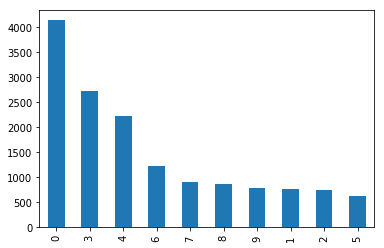

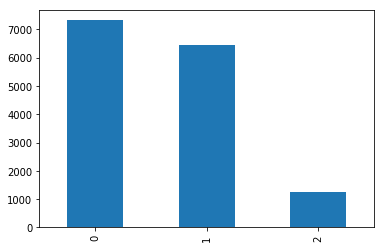

In [113]:
df['area'].value_counts().plot(kind='bar')
plt.show()
df['salario'].value_counts().plot(kind='bar');

In [6]:
df.groupby('salario').mean()

,satisfacao,ultima_avaliacao,volume_projetos,media_horas_mensais,tempo_cia,acidente_trabalho,saiu,promocao_ultimos_5_anos
salario,,,,,,,,
alto,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
baixo,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
mediano,0.621789,0.717300,3.813344,201.328937,3.528627,0.145384,0.204189,0.028084


In [7]:
df.groupby('area').mean()

,satisfacao,ultima_avaliacao,volume_projetos,media_horas_mensais,tempo_cia,acidente_trabalho,saiu,promocao_ultimos_5_anos
area,,,,,,,,
P&D,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
RH,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
TI,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
area tecnica,0.607897,0.721099,3.877941,202.497426,3.411397,0.140074,0.256250,0.010294
comercial,0.614402,0.709681,3.776033,200.896593,3.533462,0.141822,0.244745,0.024160
contabilidade,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
gerencia,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
produtos,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000


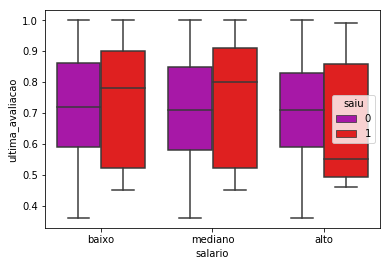

In [8]:
sns.boxplot(x="salario", y="ultima_avaliacao",
            hue="saiu", palette=["m", "r"],
            data=df);

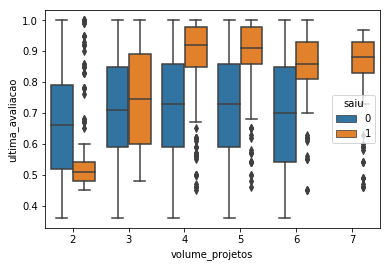

In [115]:
sns.boxplot(x='volume_projetos', y='ultima_avaliacao', hue='saiu', data=df)

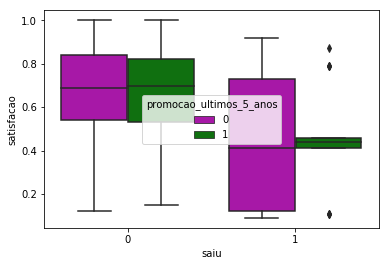

In [9]:
sns.boxplot(x="saiu", y="satisfacao",
            hue="promocao_ultimos_5_anos", palette=["m", "g", 'r'],
            data=df);

C:\Users\rodri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


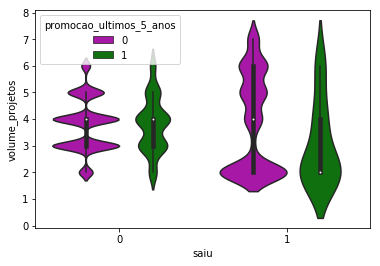

In [11]:
sns.violinplot(x="saiu", y="volume_projetos",
            hue="promocao_ultimos_5_anos", palette=["m", "g", 'r'],
            data=df);

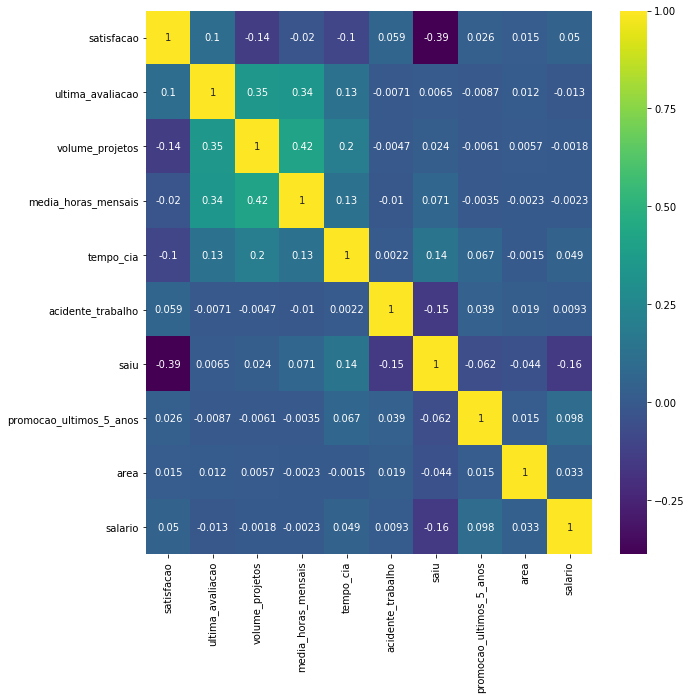

In [120]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap((corr), xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='viridis', annot=True)

In [12]:
sairam = df[df['saiu']==1].copy()
ficaram = df[df['saiu']==0].copy()

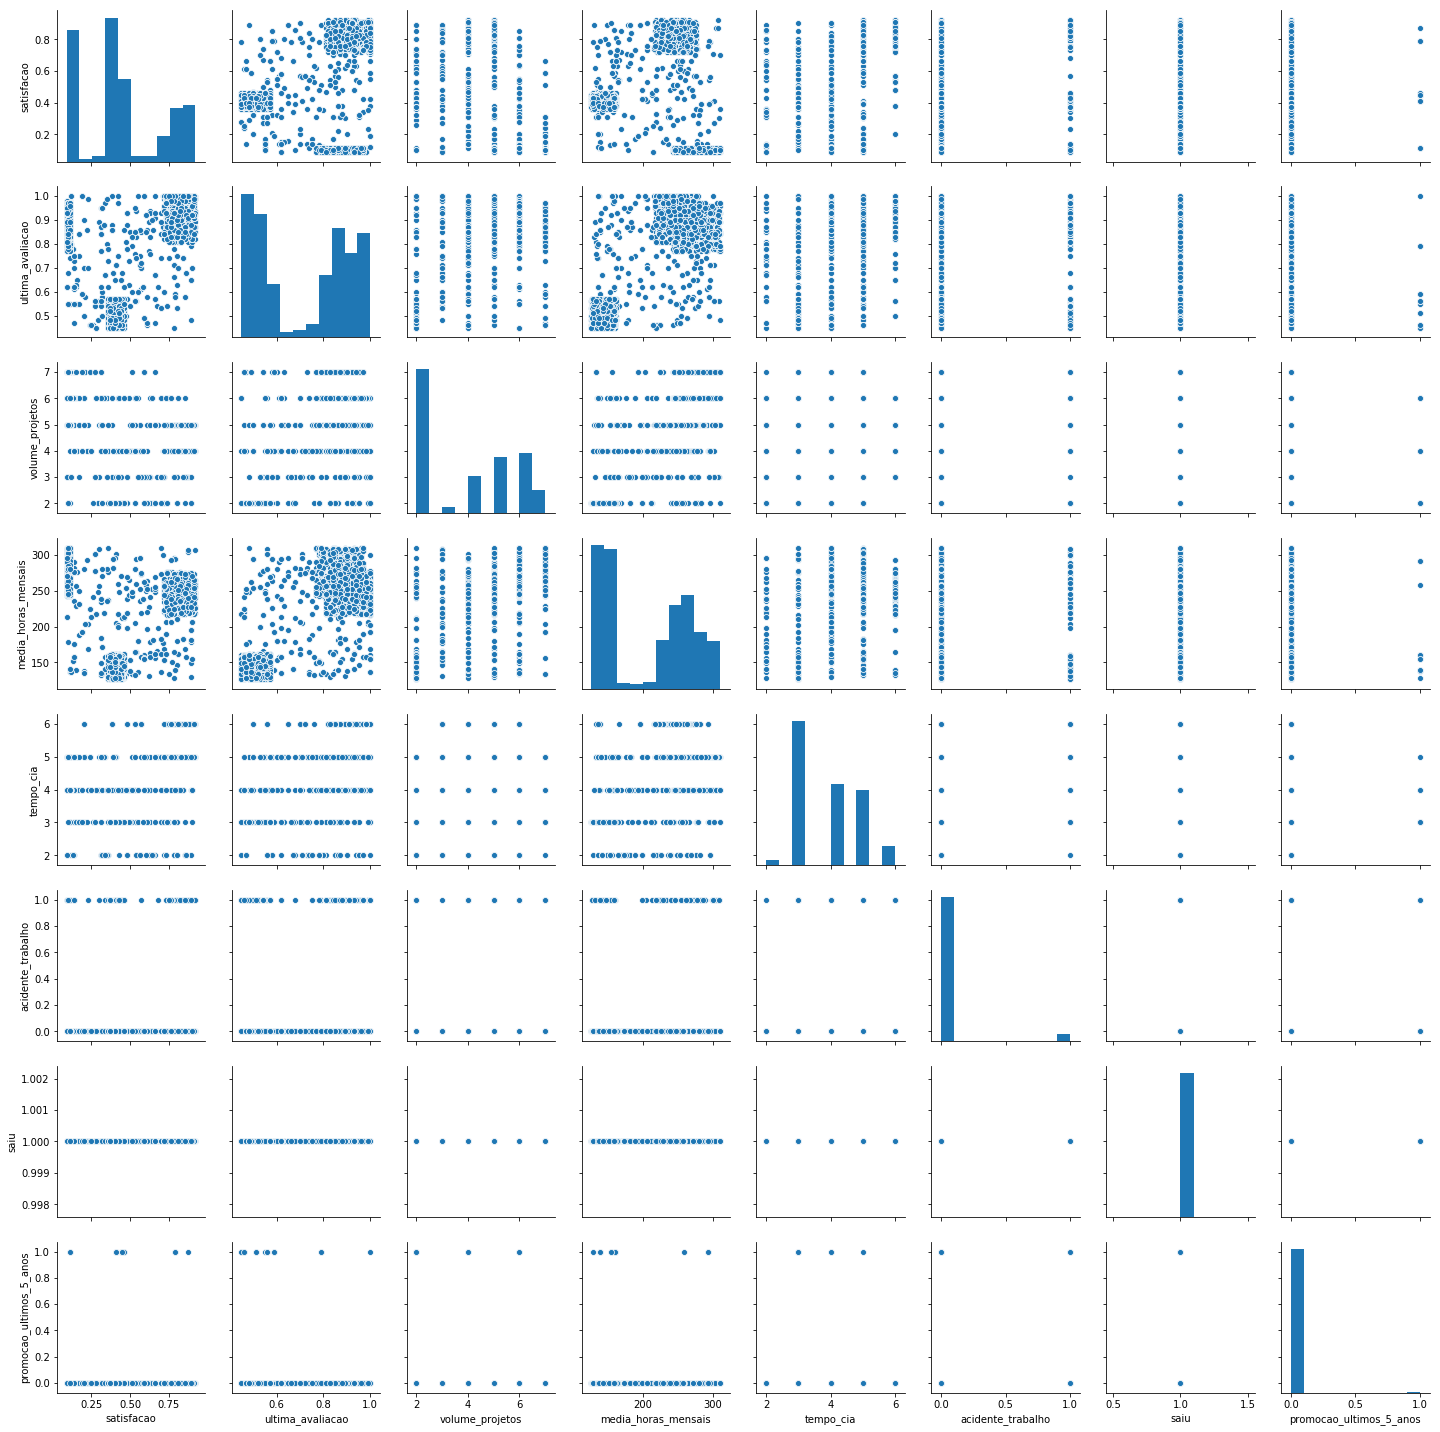

In [13]:
sns.pairplot(sairam);

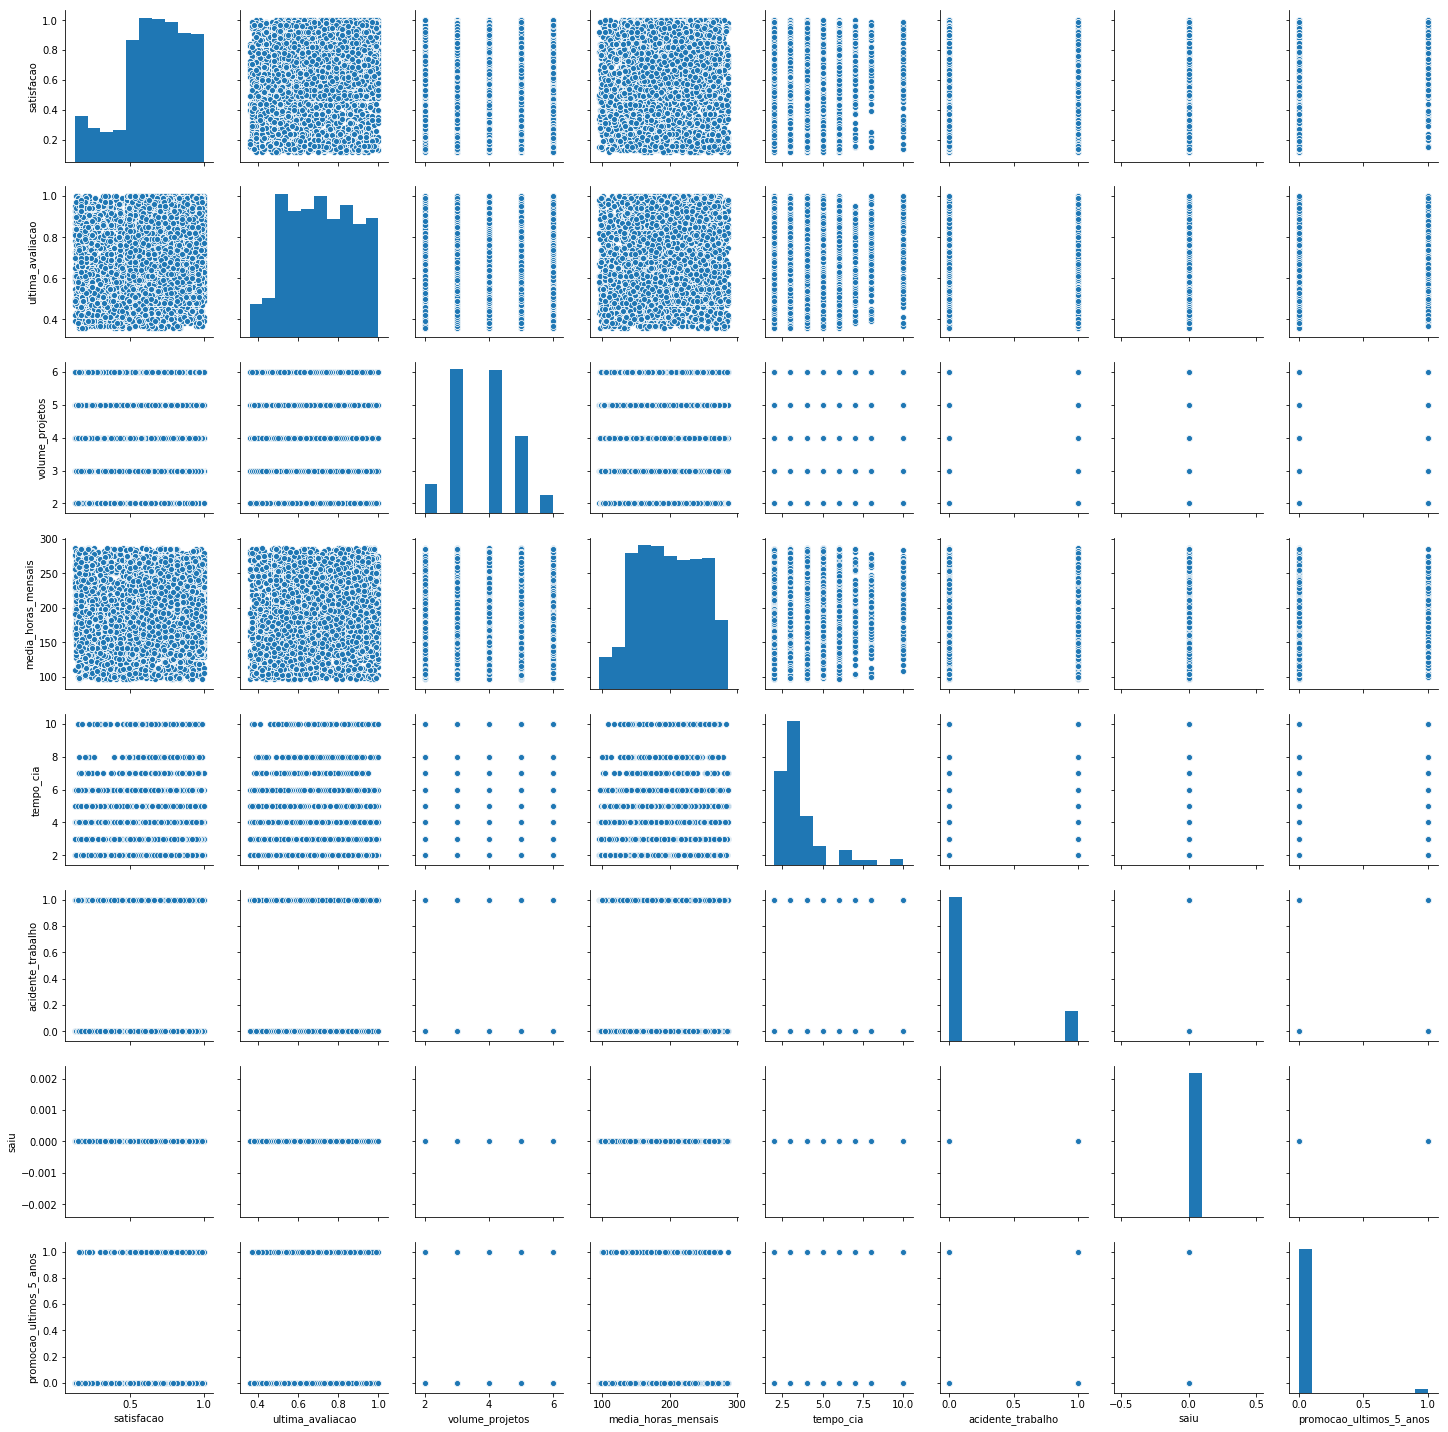

In [14]:
sns.pairplot(ficaram);

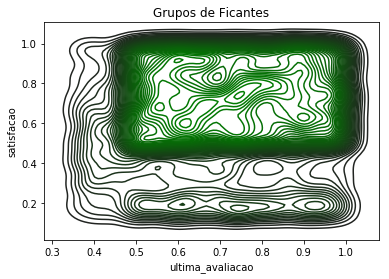

In [15]:
sns.kdeplot(ficaram['ultima_avaliacao'], ficaram['satisfacao'], color='g', n_levels=50);
plt.title('Grupos de Ficantes')
plt.xlabel('ultima_avaliacao')
plt.ylabel('satisfacao');

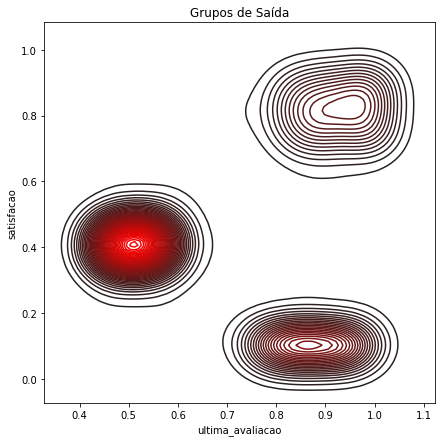

In [16]:
plt.figure(figsize=(7,7))
sns.kdeplot(sairam['ultima_avaliacao'], sairam['satisfacao'], color='r', n_levels=50);
plt.title('Grupos de Saída')
plt.xlabel('ultima_avaliacao')
plt.ylabel('satisfacao');

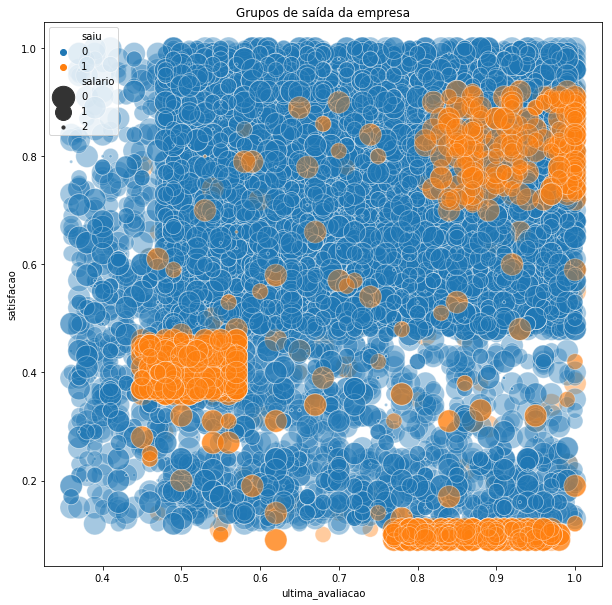

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="ultima_avaliacao", y="satisfacao",
                     hue="saiu", size="salario",
                     sizes=(500, 10),
                     data=df, alpha=0.4);

plt.title('Grupos de saída da empresa');

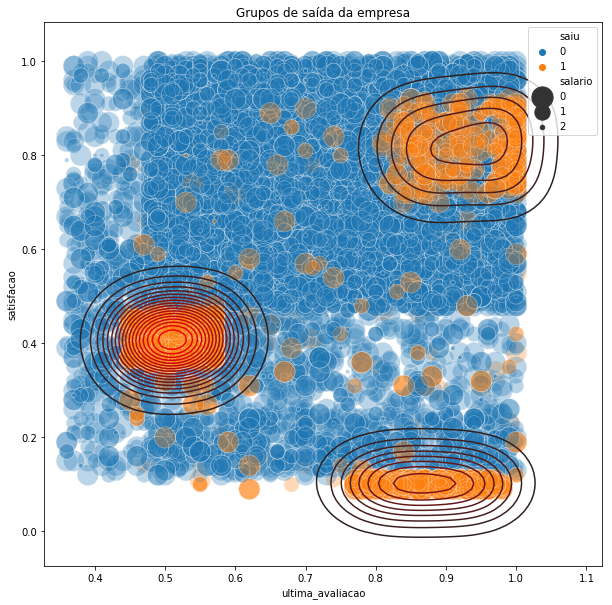

In [19]:
plt.figure(figsize=(10,10))
sns.kdeplot(sairam['ultima_avaliacao'], sairam['satisfacao'], color='r', n_levels=20);
sns.scatterplot(x="ultima_avaliacao", y="satisfacao",
                     hue="saiu", size="salario",
                     sizes=(450, 20),
                     data=df, alpha=0.3);

plt.title('Grupos de saída da empresa');

In [38]:
#Transformando salário em número:
d = {'baixo':0, 'mediano':1, 'alto':2}
df['salario'] = df['salario'].map(d)

In [39]:
#Transformando a área em número:
df['area'].unique()

array(['comercial', 'contabilidade', 'RH', 'area tecnica', 'suporte',
       'gerencia', 'TI', 'produtos', 'marketing', 'P&D'], dtype=object)

In [40]:
#Transformando a área em número:
d = {'comercial':0, 'contabilidade':1, 'RH':2, 'area tecnica':3, 'suporte':4,
       'gerencia':5, 'TI':6, 'produtos':7, 'marketing':8, 'P&D':9}
df['area'] = df['area'].map(d)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [49]:
from sklearn.model_selection import train_test_split

features = ['satisfacao', 'ultima_avaliacao', 'volume_projetos',
       'media_horas_mensais', 'tempo_cia', 'acidente_trabalho',
       'promocao_ultimos_5_anos', 'area', 'salario']
target = ['saiu']


X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

In [56]:
rf.fit(X_train,y_train)

C:\Users\rodri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [57]:
y_pred = rf.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
print("Acuracidade do modelo:", accuracy_score(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))
print("Matriz de Confusão: \n\n",confusion_matrix(y_test, y_pred))

Acuracidade do modelo: 0.9911111111111112 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3421
           1       0.99      0.97      0.98      1079

   micro avg       0.99      0.99      0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500

Matriz de Confusão: 

 [[3415    6]
 [  34 1045]]


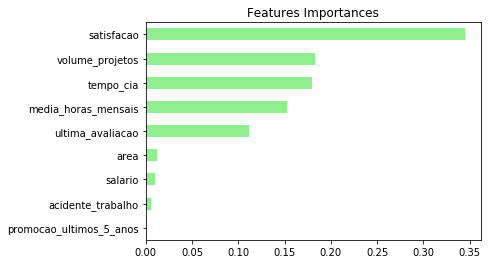

In [60]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

## Criando um modelo interpretável

In [108]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=12, max_depth=3, criterion='gini')

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

print("Acuracidade do modelo:", accuracy_score(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))
print("Matriz de Confusão: \n\n",confusion_matrix(y_test, y_pred))

Acuracidade do modelo: 0.9515555555555556 

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3421
           1       0.89      0.91      0.90      1079

   micro avg       0.95      0.95      0.95      4500
   macro avg       0.93      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500

Matriz de Confusão: 

 [[3297  124]
 [  94  985]]


In [109]:
from sklearn.tree import export_graphviz
import pydot

In [110]:
export_graphviz(dt, 
                out_file='treeHR.dot', 
                feature_names = df[features].columns,
                class_names = ['Ficou', 'Saiu'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [111]:
(graph,) = pydot.graph_from_dot_file('treeHR.dot')
graph.write_png('treeHR.png')

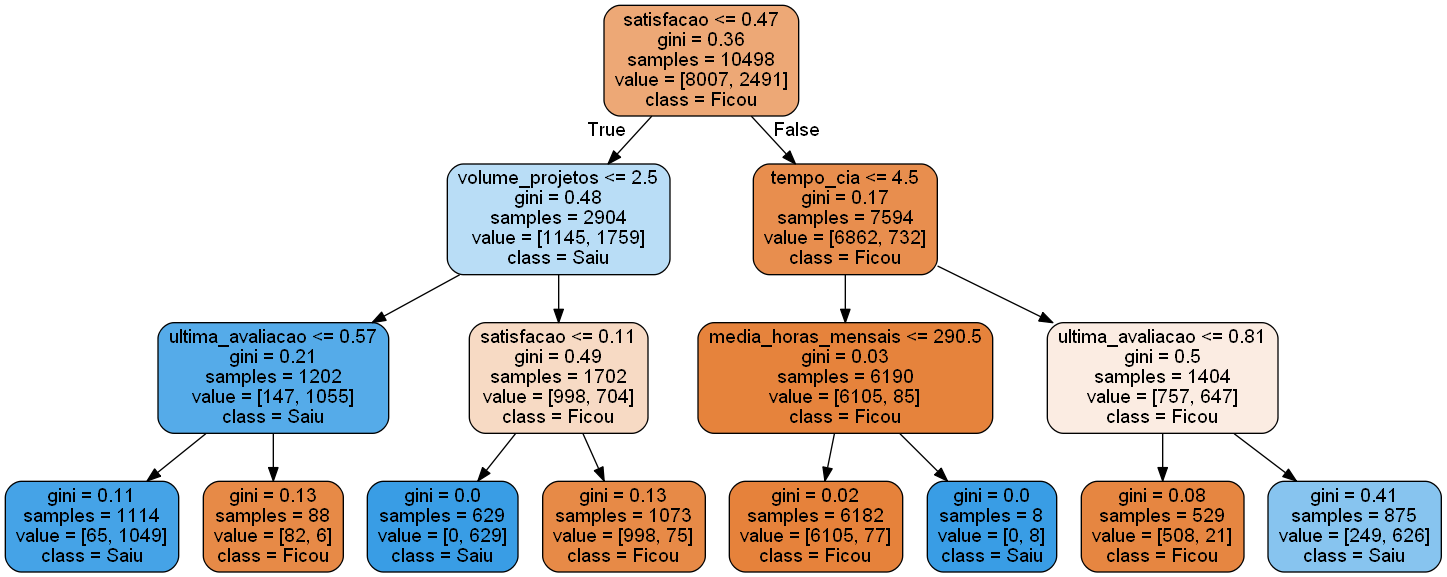

In [112]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'treeHR.png')